# Q1

In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

# Hypothesis Testing Exercise
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Minitab File : Cutlets.mtw


# We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data
We need to check whether the mean of both samples are different and
Is there any significance difference between the two samples?

Step1

make two hypothesis
- Null hypothesis as Ho:µ1=µ2(There is no difference in diameters of cutlets between two units)
- Alternate hypothesis as Ha:µ1≠µ2(There is significant difference in diameters of cutlets between two units)

Step2

Decide a cut-off value
- significance 5%
- alpha=0.05

As it is a two -tailed test
- alpha/2=0.025

In [14]:
#importing file
df=pd.read_csv('Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [15]:
#Applying descriptive statistics
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [10]:
#checking for null and duplicate value

In [16]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [17]:
df[df.duplicated()].shape

(0, 2)

In [18]:
df[df.duplicated()]

,Unit A,Unit B


In [19]:
#Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


# Plotting the data

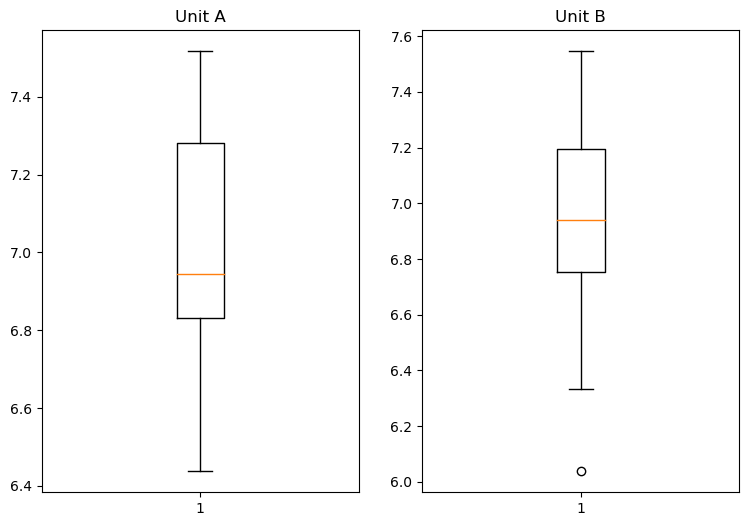

In [5]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B')
plt.show()

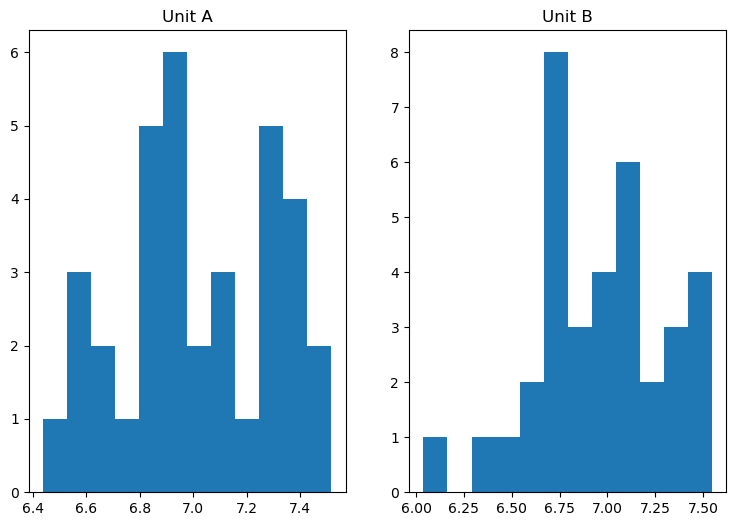

In [6]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(df['Unit A'], bins = 12)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit B'], bins = 12)
plt.title('Unit B')
plt.show()

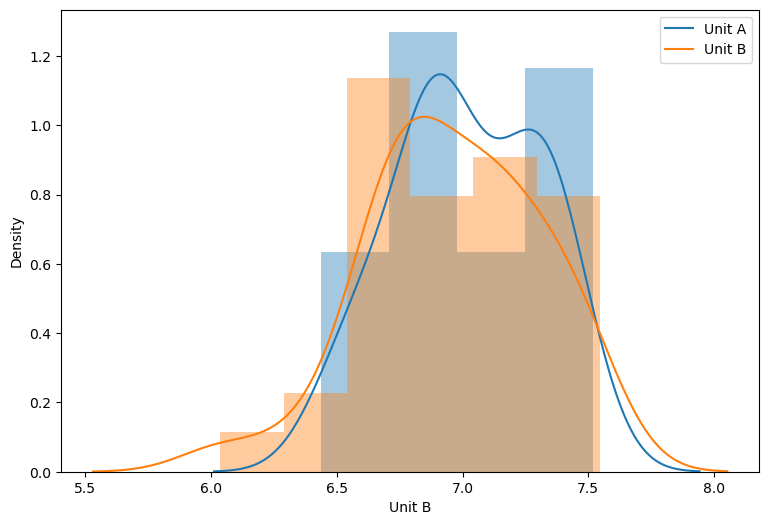

In [11]:
plt.figure(figsize = (9,6))
labels = ['Unit A', 'Unit B']
sns.distplot(df['Unit A'], kde = True)
sns.distplot(df['Unit B'],hist = True)
plt.legend(labels)

Step3

Compare Evidences with Hypothesis using t-statistics

In [22]:
#2-Sample 2-tail t test:    #ind=independent
statistic , p_value = stats.ttest_ind(df['Unit A'],df['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


Compare p_value with α (significance level)

if p_value >  α we failed to reject null hypothesis 


if p_value < α we reject null hypothesis

In [24]:
#interpreting p-value
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


# we fail to reject Null hypothesis, there is no significant difference in diameters of cutlets between two units

# QUE2

# A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
    Minitab File: LabTAT.mtw


We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

We need to check whether the mean of any of these samples are different or the same?

Step 1

Make two Hypothesis one contradicting to other

we want to prove

Null Hypothesis:µ1=µ2=µ3=µ4
    

 
Alternative Hypthosis: Atleast One of them is Different
    
    
Step 2

Decide a cut-off value

Significance 5%

alpha = 0.05

In [25]:
LabTAT=pd.read_csv("LabTAT.csv")
LabTAT

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [26]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [58]:
#checking for null and duplicate value

In [27]:
LabTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [28]:
LabTAT[LabTAT.duplicated()].shape

(0, 4)

In [29]:
LabTAT[LabTAT.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [30]:
#Checking the data type
LabTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


# Plotting the data

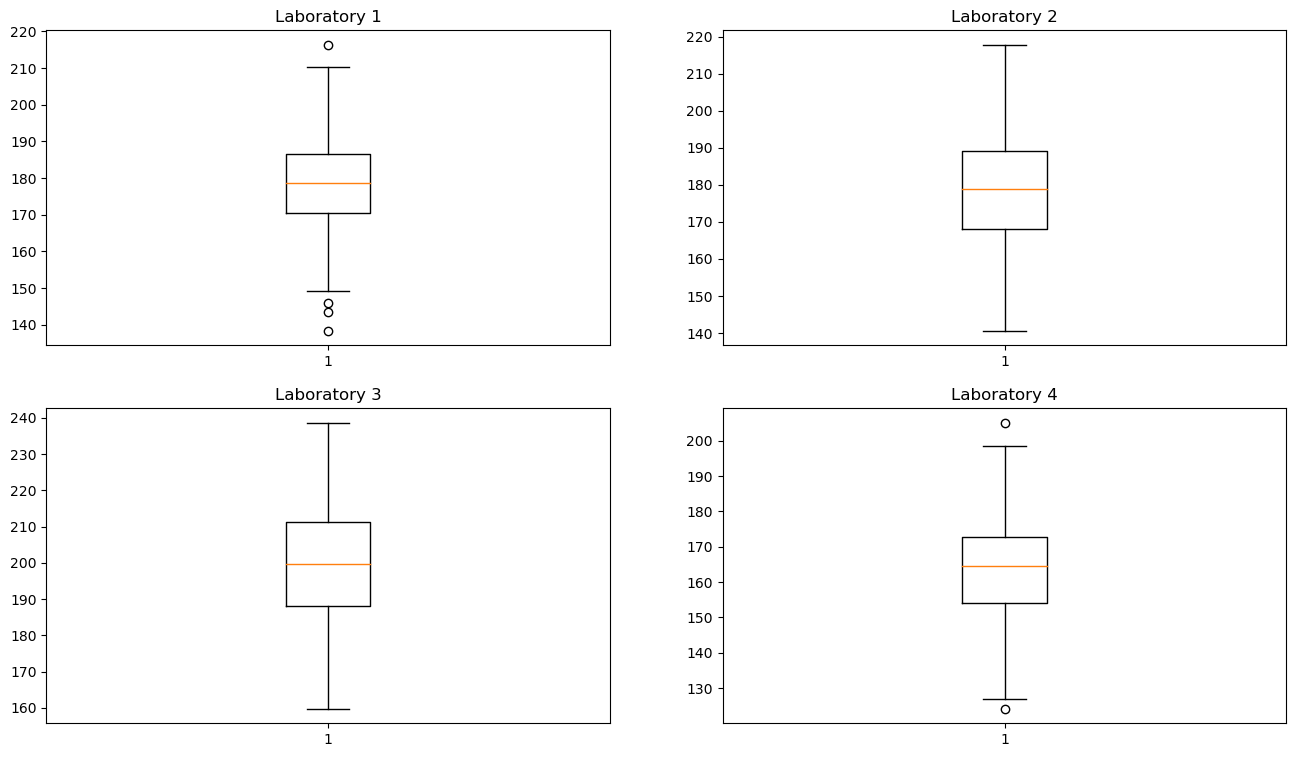

In [31]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

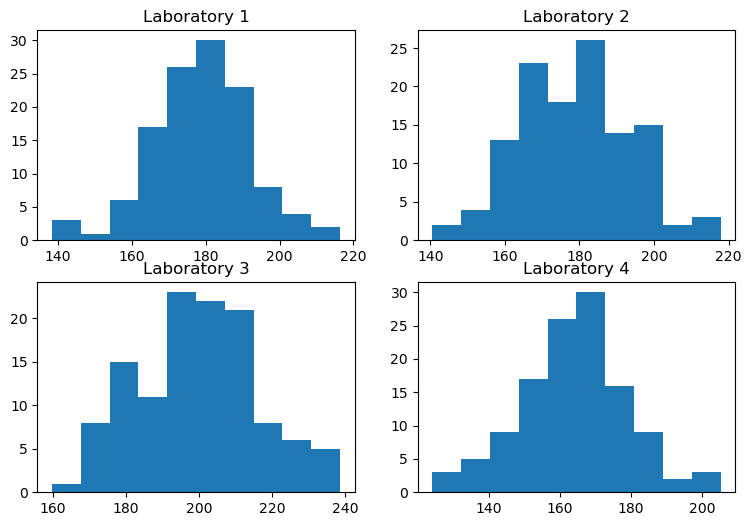

In [33]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

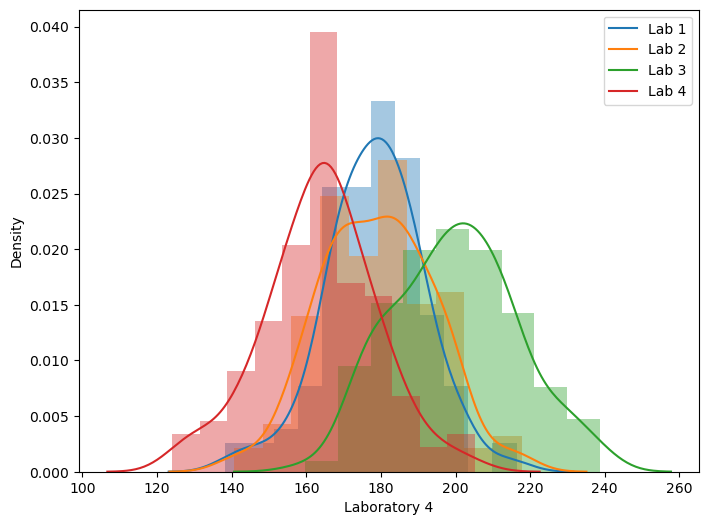

In [34]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(LabTAT['Laboratory 1'], kde = True)
sns.distplot(LabTAT['Laboratory 2'],hist = True)
sns.distplot(LabTAT['Laboratory 3'],hist = True)
sns.distplot(LabTAT['Laboratory 4'],hist = True)
plt.legend(labels)

- Compare Evidences with Hypothesis using t-statictic

In [64]:
stats.f_oneway(LabTAT.iloc[0:,0],LabTAT.iloc[0:,1],LabTAT.iloc[0:,2],LabTAT.iloc[0:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

pvalue>0.05 so choose null hypothesis & reject alternate hypothesis

Compare p_value with 'α'(Significane Level)

If p_value ≠ α we failed to reject Null Hypothesis because of lack of evidence

If p_value  = 'α' we reject Null Hypothesis


alpha = 0.05
pvalue=2.1156
pvalue>0.05 

# Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# Que3

# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

We are going to conduct a Test of Independence using Chi-Square test with Contingency table

make two hypothesis

- Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions
- Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions

Given:-
Significance 5%

alpha = 0.05    

alpha = 1-0.95 = 0.05    
(as it is one-tail test)

In [35]:
#importing file
Buyer=pd.read_csv('BuyerRatio.csv',index_col = 0)
Buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [36]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

- convert observed value into expected value

- Applying Chi-Square contingency table

In [37]:
stat, p, dof, exp = stats.chi2_contingency(Buyer) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [38]:
stats.chi2_contingency(table) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [39]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [40]:
#comparing Evidence with Hypothesis
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


Compare p_value with 'α'(Significane Level)

If p_value ≠ α we failed to reject Null Hypothesis because of lack of evidence

If p_value = 'α' we reject Null Hypothesis

In [41]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is no association or dependency between the gender based buyer rations across regions')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


# We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# QUE4

# TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw

# We are going to conduct a Test of Independence using Chi-Square test with Contingency table

make two hypothesis

- Null hypothesis as Ho:independence of categorical variable(customer order forms defective% does not varies by centre)

- Alternate hypothesis as Ha:dependence of categorical variable(customer order forms defective% varies by centre)

In [133]:
df1=pd.read_csv('Costomer+OrderForm.csv')
df1

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [134]:
#Applying Descriptive Statistics
df1.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [135]:
#Checking for Null Values
df1.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [136]:
df1[df1.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [137]:
#Checking the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [138]:
#Checking value counts in data
df. Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [139]:
df. Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [140]:
df. Malta.value_counts()


Error Free    269
Defective      31
Name: Malta, dtype: int64

In [141]:
df. India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [142]:
#Make a contengency table
obs=np.array([[271,267,269,280],[29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [150]:
#Chi2 contengency independance test
stat, p, df, exp = stats.chi2_contingency(obs)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [144]:
#Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [151]:
#Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


Plotting the data

Compare p_value with 'α '(Significane Level)

If p_value ≠ 'α ' we failed to reject Null Hypothesis

If p_value = 'α' we reject Null Hypothesis

interpreting p-value

In [152]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a independence of categorical variable')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


# We fail to reject Null hypothesis.